# Iris Feature Selection

In [ ]:
import matplotlib.pyplot as plt
from sklearn_genetic import GAFeatureSelectionCV
from sklearn_genetic.plots import plot_fitness_evolution
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
import numpy as np


### Import the data and split it in train and test sets
Random noise is added to simulate useless variables


In [2]:
data = load_iris()
X, y = data["data"], data["target"]

noise = np.random.uniform(0, 10, size=(X.shape[0], 10))

X = np.hstack((X, noise))
X.shape

(150, 14)

### Split the training and test data

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

### Define the GAFeatureSelectionCV options


In [4]:
clf = SVC(gamma='auto')

evolved_estimator = GAFeatureSelectionCV(
    estimator=clf,
    cv=3,
    scoring="accuracy",
    population_size=30,
    generations=20,
    n_jobs=-1,
    verbose=True,
    keep_top_k=2,
    elitism=True,
)

### Fit the model and see some results

In [5]:
evolved_estimator.fit(X, y)
features = evolved_estimator.support_

# Predict only with the subset of selected features
y_predict_ga = evolved_estimator.predict(X_test)
accuracy = accuracy_score(y_test, y_predict_ga)

gen	nevals	fitness 	fitness_std	fitness_max	fitness_min
0  	30    	0.550444	0.153446   	0.86       	0.293333   
1  	60    	0.636889	0.119365   	0.86       	0.473333   
2  	60    	0.698667	0.11242    	0.873333   	0.46       
3  	60    	0.707556	0.103876   	0.873333   	0.486667   
4  	60    	0.723556	0.144086   	0.9        	0.366667   
5  	60    	0.745556	0.152637   	0.913333   	0.366667   
6  	60    	0.792889	0.108402   	0.873333   	0.513333   
7  	60    	0.749111	0.16456    	0.873333   	0.413333   
8  	60    	0.728889	0.179747   	0.966667   	0.373333   
9  	60    	0.728222	0.158994   	0.893333   	0.42       
10 	60    	0.785556	0.134892   	0.94       	0.48       
11 	60    	0.733556	0.175942   	0.94       	0.44       
12 	60    	0.784889	0.150554   	0.94       	0.413333   
13 	60    	0.818444	0.148101   	0.966667   	0.413333   
14 	60    	0.871778	0.116272   	0.966667   	0.453333   
15 	60    	0.801556	0.184163   	0.966667   	0.386667   
16 	60    	0.810222	0.163994   	0.966667   	0.39

In [6]:
#Best features found
print(evolved_estimator.support_)
print("accuracy score: ", "{:.2f}".format(accuracy))

[False False  True  True False False False False False False False False
 False False]
accuracy score:  0.96


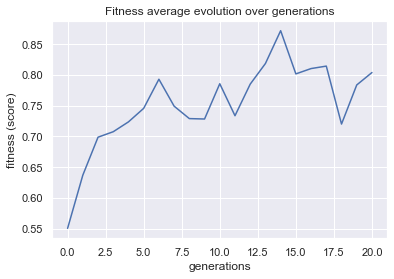

In [7]:
plot = plot_fitness_evolution(evolved_estimator, metric="fitness")
plt.show()

In [8]:
# Convert the original input to the selected input
evolved_estimator.transform(X_test)

array([[5.1, 2.4],
       [4. , 1. ],
       [1.4, 0.2],
       [6.3, 1.8],
       [1.5, 0.2],
       [6. , 2.5],
       [1.3, 0.3],
       [4.7, 1.5],
       [4.8, 1.4],
       [4. , 1.3],
       [5.6, 1.4],
       [4.5, 1.5],
       [4.7, 1.2],
       [4.6, 1.5],
       [4.7, 1.4],
       [1.4, 0.1],
       [4.5, 1.5],
       [4.4, 1.2],
       [1.4, 0.3],
       [1.3, 0.4],
       [4.9, 2. ],
       [4.5, 1.5],
       [1.9, 0.2],
       [1.4, 0.2],
       [4.8, 1.8],
       [1. , 0.2],
       [1.9, 0.4],
       [4.3, 1.3],
       [3.3, 1. ],
       [1.6, 0.4],
       [5.5, 1.8],
       [4.5, 1.5],
       [1.5, 0.2],
       [4.9, 1.8],
       [5.6, 2.2],
       [3.9, 1.4],
       [1.7, 0.3],
       [5.1, 1.6],
       [4.2, 1.5],
       [4. , 1.2],
       [5.5, 2.1],
       [1.3, 0.2],
       [5.1, 2.3],
       [1.6, 0.6],
       [1.5, 0.2],
       [3.5, 1. ],
       [5.5, 1.8],
       [5.7, 2.5],
       [5. , 1.5],
       [5.8, 1.8]])